In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preparation

In [91]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1.2, 0.1], [0.1, 1.4]])

In [92]:
mean_02 = np.array([5, 5.5])
cov_02 = np.array([[1.2, 0.1], [0.1, 1.3]])

In [93]:
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 400)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 400)

### visualization

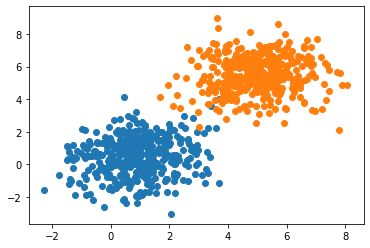

In [94]:
plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1]);

In [95]:
total = dist_01.shape[0] + dist_02.shape[0]

In [96]:
total

800

In [97]:
data = np.zeros((total, 3))

In [98]:
data[:400, :-1] = dist_01
data[400:, :-1] = dist_02
data[:400, -1] = 1

In [99]:
np.random.shuffle(data)

In [100]:
print(data)

[[ 5.34925523  4.73236151  0.        ]
 [-1.75228727 -0.67128304  1.        ]
 [ 7.19082928  3.40237317  0.        ]
 ...
 [ 3.16096943  5.18097789  0.        ]
 [ 3.13269428  5.20169872  0.        ]
 [ 0.77427655  1.11515128  1.        ]]


### Normalizing Data

In [101]:
u = np.mean(data[:, :-1], axis = 0)
sigma = np.std(data[:, :-1], axis = 0)
data[:, :-1] = (data[:, :-1] - u)/sigma

In [102]:
print(data.shape)

(800, 3)


In [103]:
ones = np.ones((data.shape[0], 1), dtype='float64')

In [104]:
final_data = np.hstack((ones, data))

In [105]:
final_data

array([[ 1.        ,  1.04710814,  0.63662532,  0.        ],
       [ 1.        , -1.99319411, -1.3136189 ,  1.        ],
       [ 1.        ,  1.83552019,  0.15661557,  0.        ],
       ...,
       [ 1.        ,  0.11026234,  0.79853669,  0.        ],
       [ 1.        ,  0.09815722,  0.8060151 ,  0.        ],
       [ 1.        , -0.91152521, -0.66887198,  1.        ]])

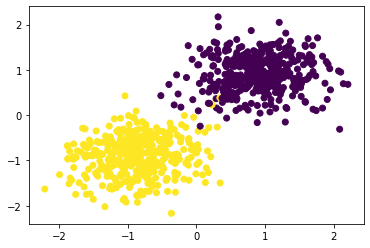

In [106]:
plt.scatter(final_data[:, 1], final_data[:, 2], c = final_data[:, 3] );

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data[:, :-1], final_data[:, -1], test_size = 0.2)

In [109]:
print(X_train.shape, X_test.shape)

(640, 3) (160, 3)


In [112]:
np.std(X_train, axis = 0)

array([0.        , 1.00233217, 1.00274283])

In [114]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [116]:
sigmoid(np.inf)

1.0

In [174]:
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

In [175]:
def error(Y, X, theta):
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        total_error += (Y[i]*np.log2(y_hat) + (1 - Y[i])*np.log2(1 - y_hat))
    
    return -total_error/m  # average loss

In [163]:
def get_grad(Y, X, theta):
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        x = X[i].reshape((-1, 1))
        grad += -(Y[i] - y_hat)*x
    return grad/m # average gradient 

In [184]:
def grad_descent(X, Y, learning_rate = 0.1):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    for i in range(500):
        theta = theta + learning_rate*get_grad(Y,X, theta)
        e = error(Y, X, theta)
        error_list.append(e)
    return error_list, theta
        

In [185]:
error_list, theta =  grad_descent(X_train, Y_train)

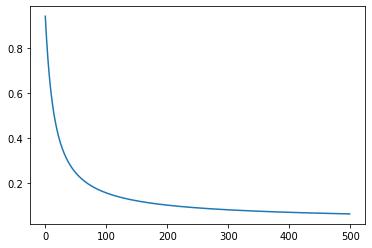

In [186]:
plt.plot(error_list)

In [187]:
theta

array([[ 0.04960056],
       [-2.37947811],
       [-2.61724981]])

In [ ]:
def draw_line():
    plt.figure(figure(5, 5))
    x = np.linspace(-3, 3, 10)
    y = -(theta[0, 0]*1 + )
    

In [ ]:
def predict(xtest, theta):
    prob = hypothesis(x, theta)
    if prob <= 0.5:
        return 0
    else:
        return 1

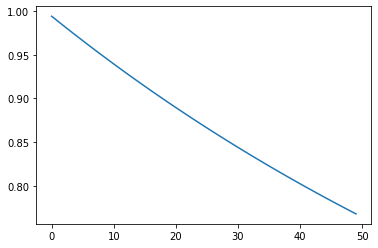

In [178]:
plt.plot(error_list);